In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/datasets/diabetes - diabetes.csv")

Mounted at /content/drive


# Data analysis of patients with diabetes

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


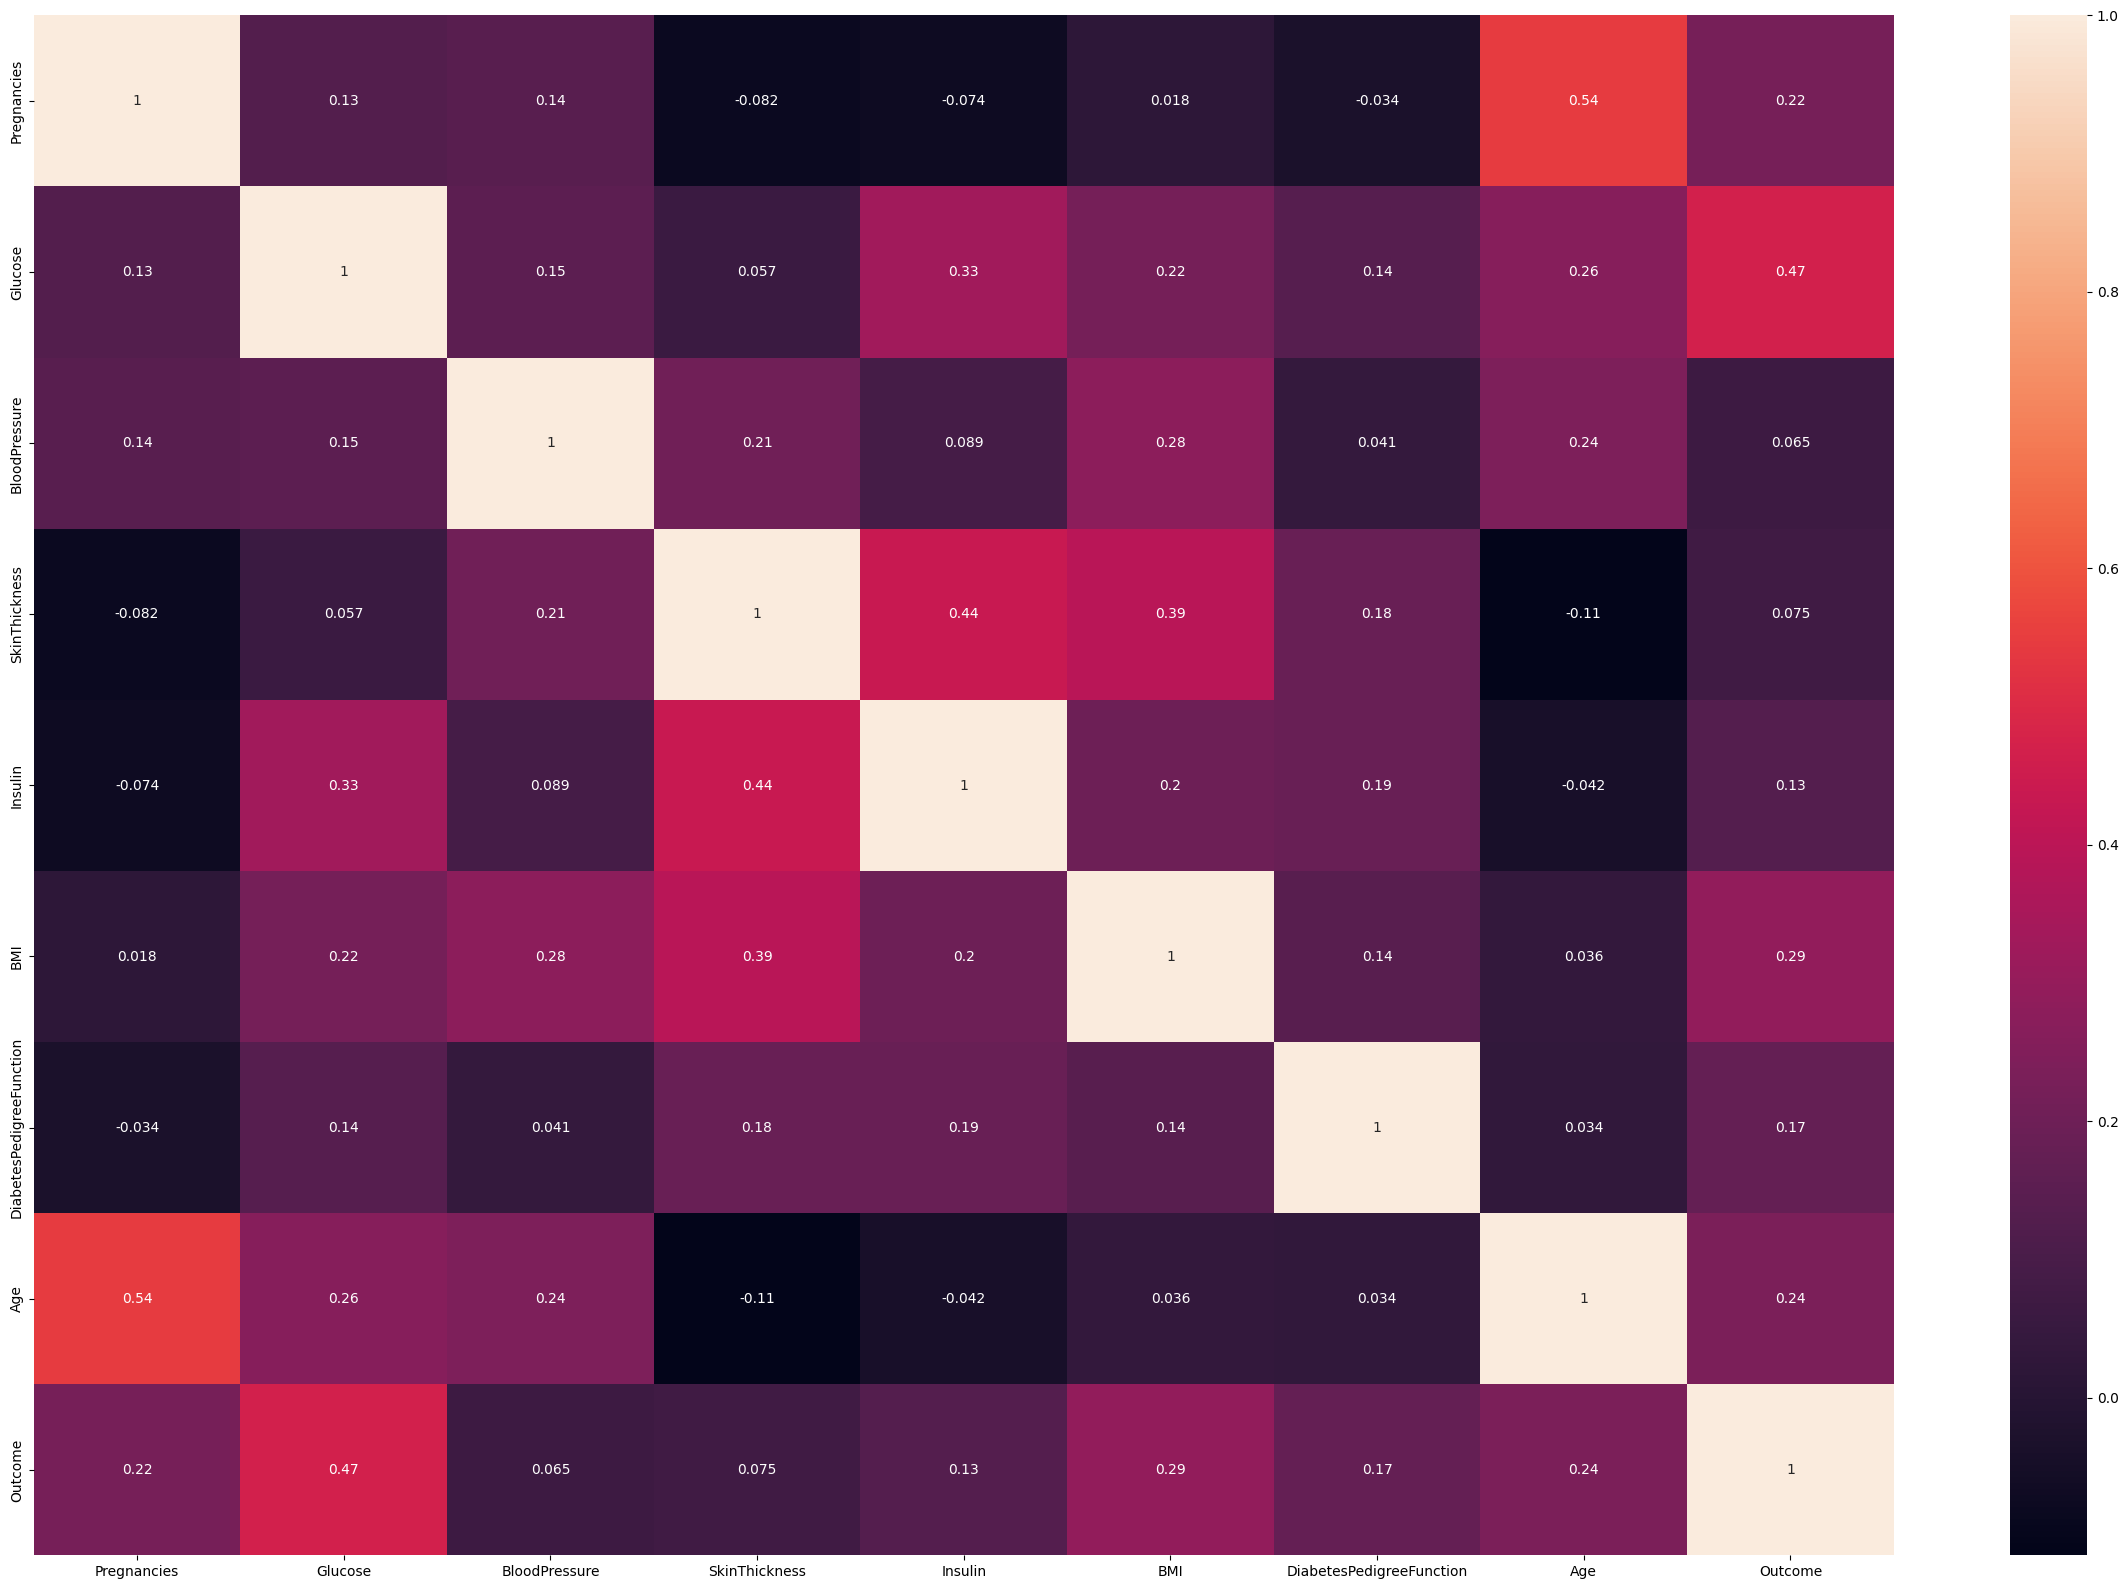

In [ ]:
plt.figure(figsize = (30,20))
sb.heatmap(data.corr(),annot = True);

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print(data.mean())

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
zero_count_per_column = (data == 0).sum()
print(zero_count_per_column)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Text(0, 0.5, 'frequency')

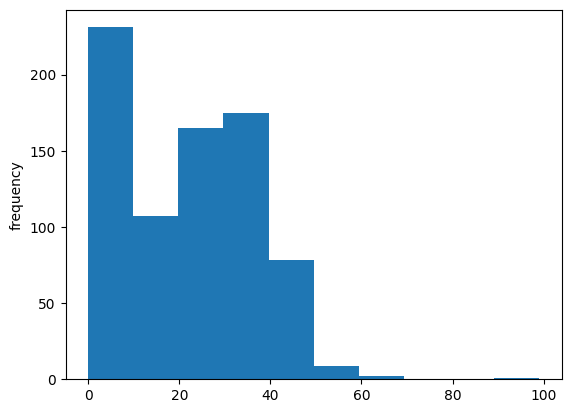

In [ ]:
plt.hist(data['SkinThickness'])
plt.ylabel('frequency')

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
20.536458333333332


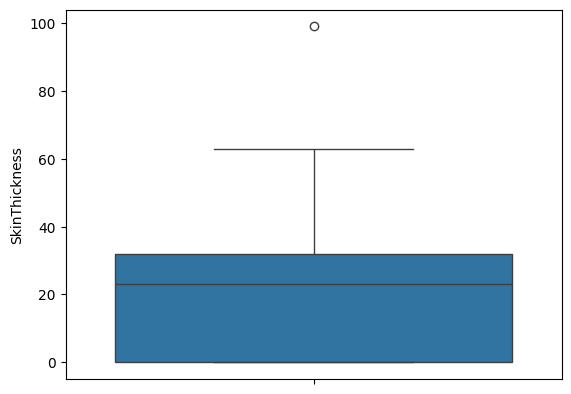

In [ ]:
import seaborn as sns
sns.boxplot(data['SkinThickness'])
print(data['SkinThickness'].describe())
mean=data['SkinThickness'].mean()
print(mean)

In [ ]:
skin_thickness_zero= data[data['SkinThickness']!=0]
skin_mean=skin_thickness_zero.mean()
print(skin_mean)

In [ ]:
data['SkinThickness'].replace(0, 29.153420, inplace = True)

Text(0, 0.5, 'frequency')

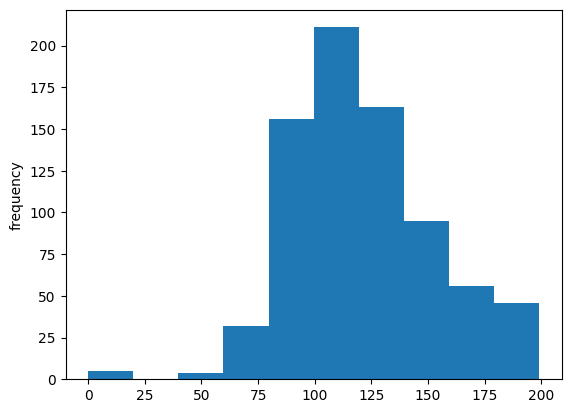

In [ ]:
plt.hist(data['Glucose'])
plt.ylabel('frequency')


<Axes: ylabel='Glucose'>

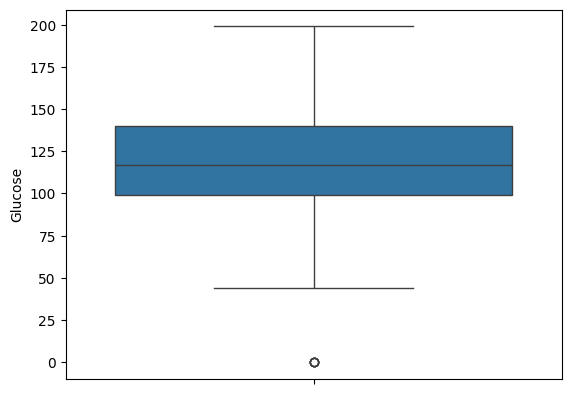

In [ ]:
sns.boxplot(data['Glucose'])

In [ ]:
Glucose_zero= data[data['Glucose']!=0]
Glucose_mean=Glucose_zero.mean()
print(Glucose_mean)
data['Glucose'].replace(0,121.686763 , inplace = True)

Pregnancies                   3.851900
Glucose                     121.686763
BloodPressure                69.115334
SkinThickness                29.150493
Insulin                      80.292267
BMI                          31.986763
DiabetesPedigreeFunction      0.472477
Age                          33.271298
Outcome                       0.348624
dtype: float64


Text(0, 0.5, 'frequency')

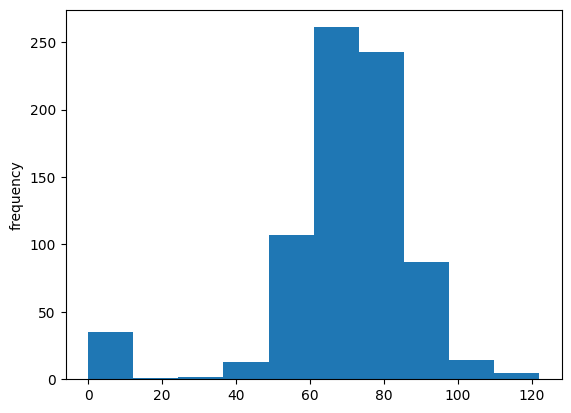

In [ ]:
plt.hist(data['BloodPressure'])
plt.ylabel('frequency')

In [ ]:
BloodPressure_zero= data[data['BloodPressure']!=0]
BloodPressure_mean=BloodPressure_zero.mean()
print(BloodPressure_mean)
data['BloodPressure'].replace(0,72.405184 , inplace = True) #removing zeros, replacing them by mean value, where mean values are calculated removing zeroes

Pregnancies                   3.855389
Glucose                     121.872352
BloodPressure                72.405184
SkinThickness                29.160660
Insulin                      83.609823
BMI                          32.292769
DiabetesPedigreeFunction      0.475861
Age                          33.361528
Outcome                       0.343793
dtype: float64


(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

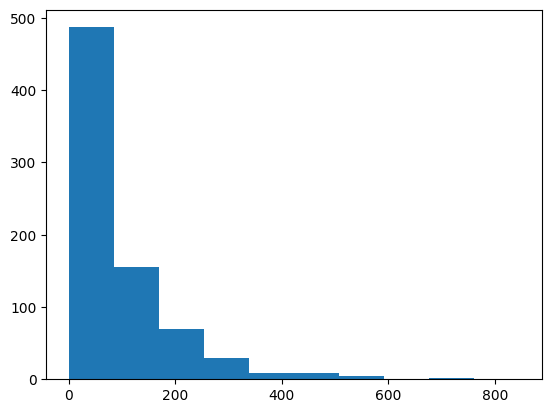

In [ ]:
plt.hist(data['Insulin'])

In [ ]:
Insulin_zero= data[data['Insulin']!=0]
Insulin_mean=Insulin_zero.mean()
print(Insulin_mean)

Pregnancies                   3.286802
Glucose                     122.613418
BloodPressure                70.654822
SkinThickness                29.106599
Insulin                     155.548223
BMI                          32.988579
DiabetesPedigreeFunction      0.525543
Age                          30.814721
Outcome                       0.329949
dtype: float64


In [ ]:
data['Insulin'].replace(0, 155.548223, inplace = True)

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

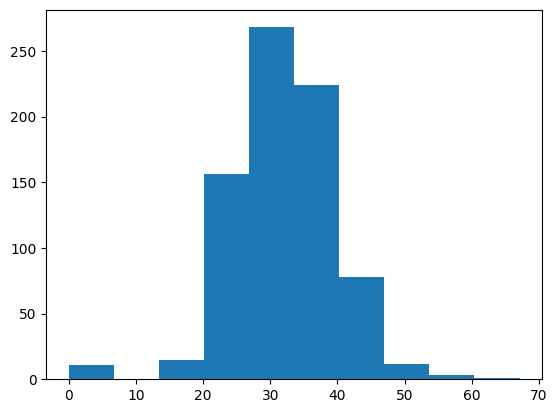

In [ ]:
plt.hist(data['BMI'])

In [ ]:
BMI_zero= data[data['BMI']!=0]
BMI_mean=BMI_zero.mean()
print(BMI_mean)

Pregnancies                   3.844122
Glucose                     121.939807
BloodPressure                72.369016
SkinThickness                29.169677
Insulin                     155.636134
BMI                          32.457464
DiabetesPedigreeFunction      0.472437
Age                          33.281374
Outcome                       0.351387
dtype: float64


In [ ]:
data['BMI'].replace(0, 32.457464, inplace = True)

In [ ]:
zero_count_per_column = (data == 0).sum()
print(zero_count_per_column)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [ ]:
#trying to fit the data to a linear regression model

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
# Selecting features and target variable
X = data[['Insulin', 'BMI', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'SkinThickness']]
y = data['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7727272727272727
Confusion Matrix:
 [[86 13]
 [22 33]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Initializing the StandardScaler
scaler = StandardScaler()
columns_to_standardize=['Insulin', 'BMI', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'SkinThickness']
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])


# Selecting features and target variable
X = data[['Insulin', 'BMI', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'SkinThickness']]
y = data['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7727272727272727
Confusion Matrix:
 [[88 11]
 [24 31]]


Now we will be working on the model 50_startup - 50_startup.csv

# Now we will be working on the model 50_startup - 50_startup.csv

In [ ]:
data2=pd.read_csv("/content/drive/MyDrive/datasets/50_Startups - 50_Startups.csv")

In [ ]:
data2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


<ipython-input-12-32105566e49e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data2.corr(),annot = True);


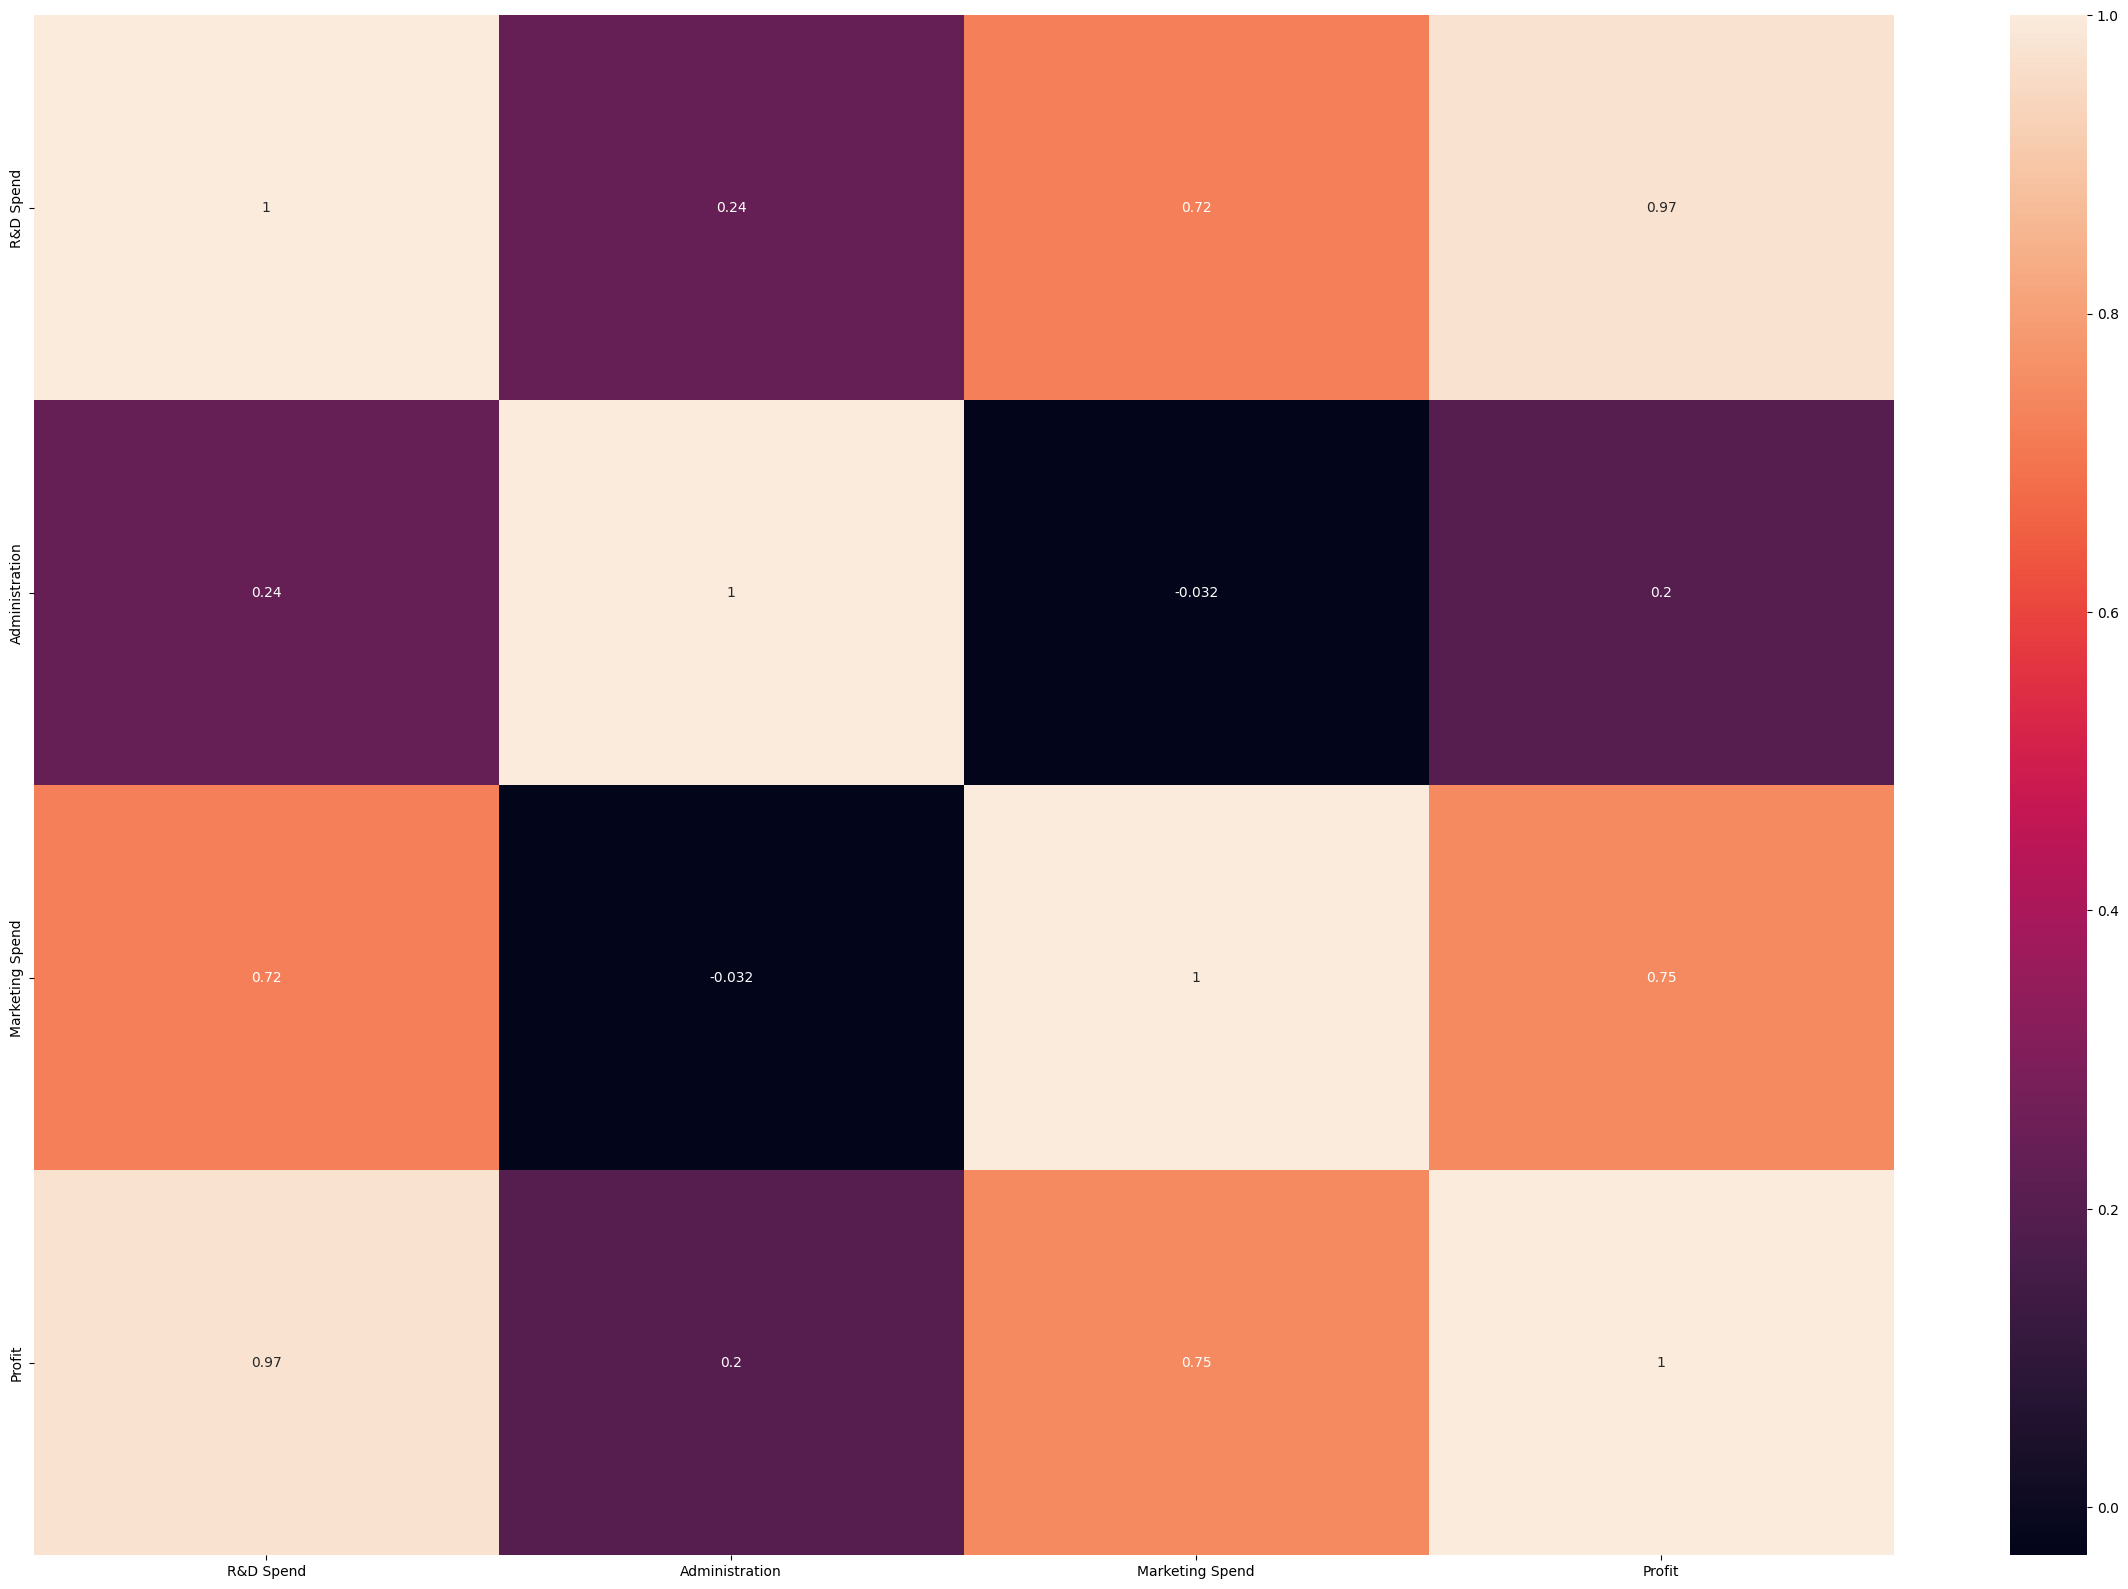

In [ ]:
plt.figure(figsize = (30,20))
sb.heatmap(data2.corr(),annot = True);

As the names of the states are given in words, namely california florida new york we will have to encode the data to numerical values for applying the regression

In [ ]:
# Displaying the original DataFrame
print("Original DataFrame:")
print(data2)

# One-hot encoding the 'Cities' column
encoded_data = pd.get_dummies(data2['State'], prefix='state')

# Concatenating the encoded data with the original DataFrame
data2 = pd.concat([data2, encoded_data], axis=1)

# Dropping the original 'Cities' column
data2 = data2.drop('State', axis=1)

# Displaying the DataFrame after encoding
print("\nDataFrame after encoding:")
print(data2)


Original DataFrame:
    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52


In [ ]:
from sklearn.metrics import mean_absolute_error
# Selecting features and target variable
X = data2[['R&D Spend', 	'Administration'	, 'Marketing Spend', 'state_New York', 'state_Florida', 'state_California']]
y = data2['Profit']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model performance
mse = mean_absolute_error(y_test, predictions)

print("\nMean absolute Error:", mse)


Mean absolute Error: 6961.47781325024


# Now we're trying to fit the data for user data csv file

In [ ]:
data3=pd.read_csv("/content/drive/MyDrive/datasets/User_Data - User_Data.csv")

In [ ]:
data3

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<ipython-input-14-46c4bceebaaf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data3.corr(),annot = True);


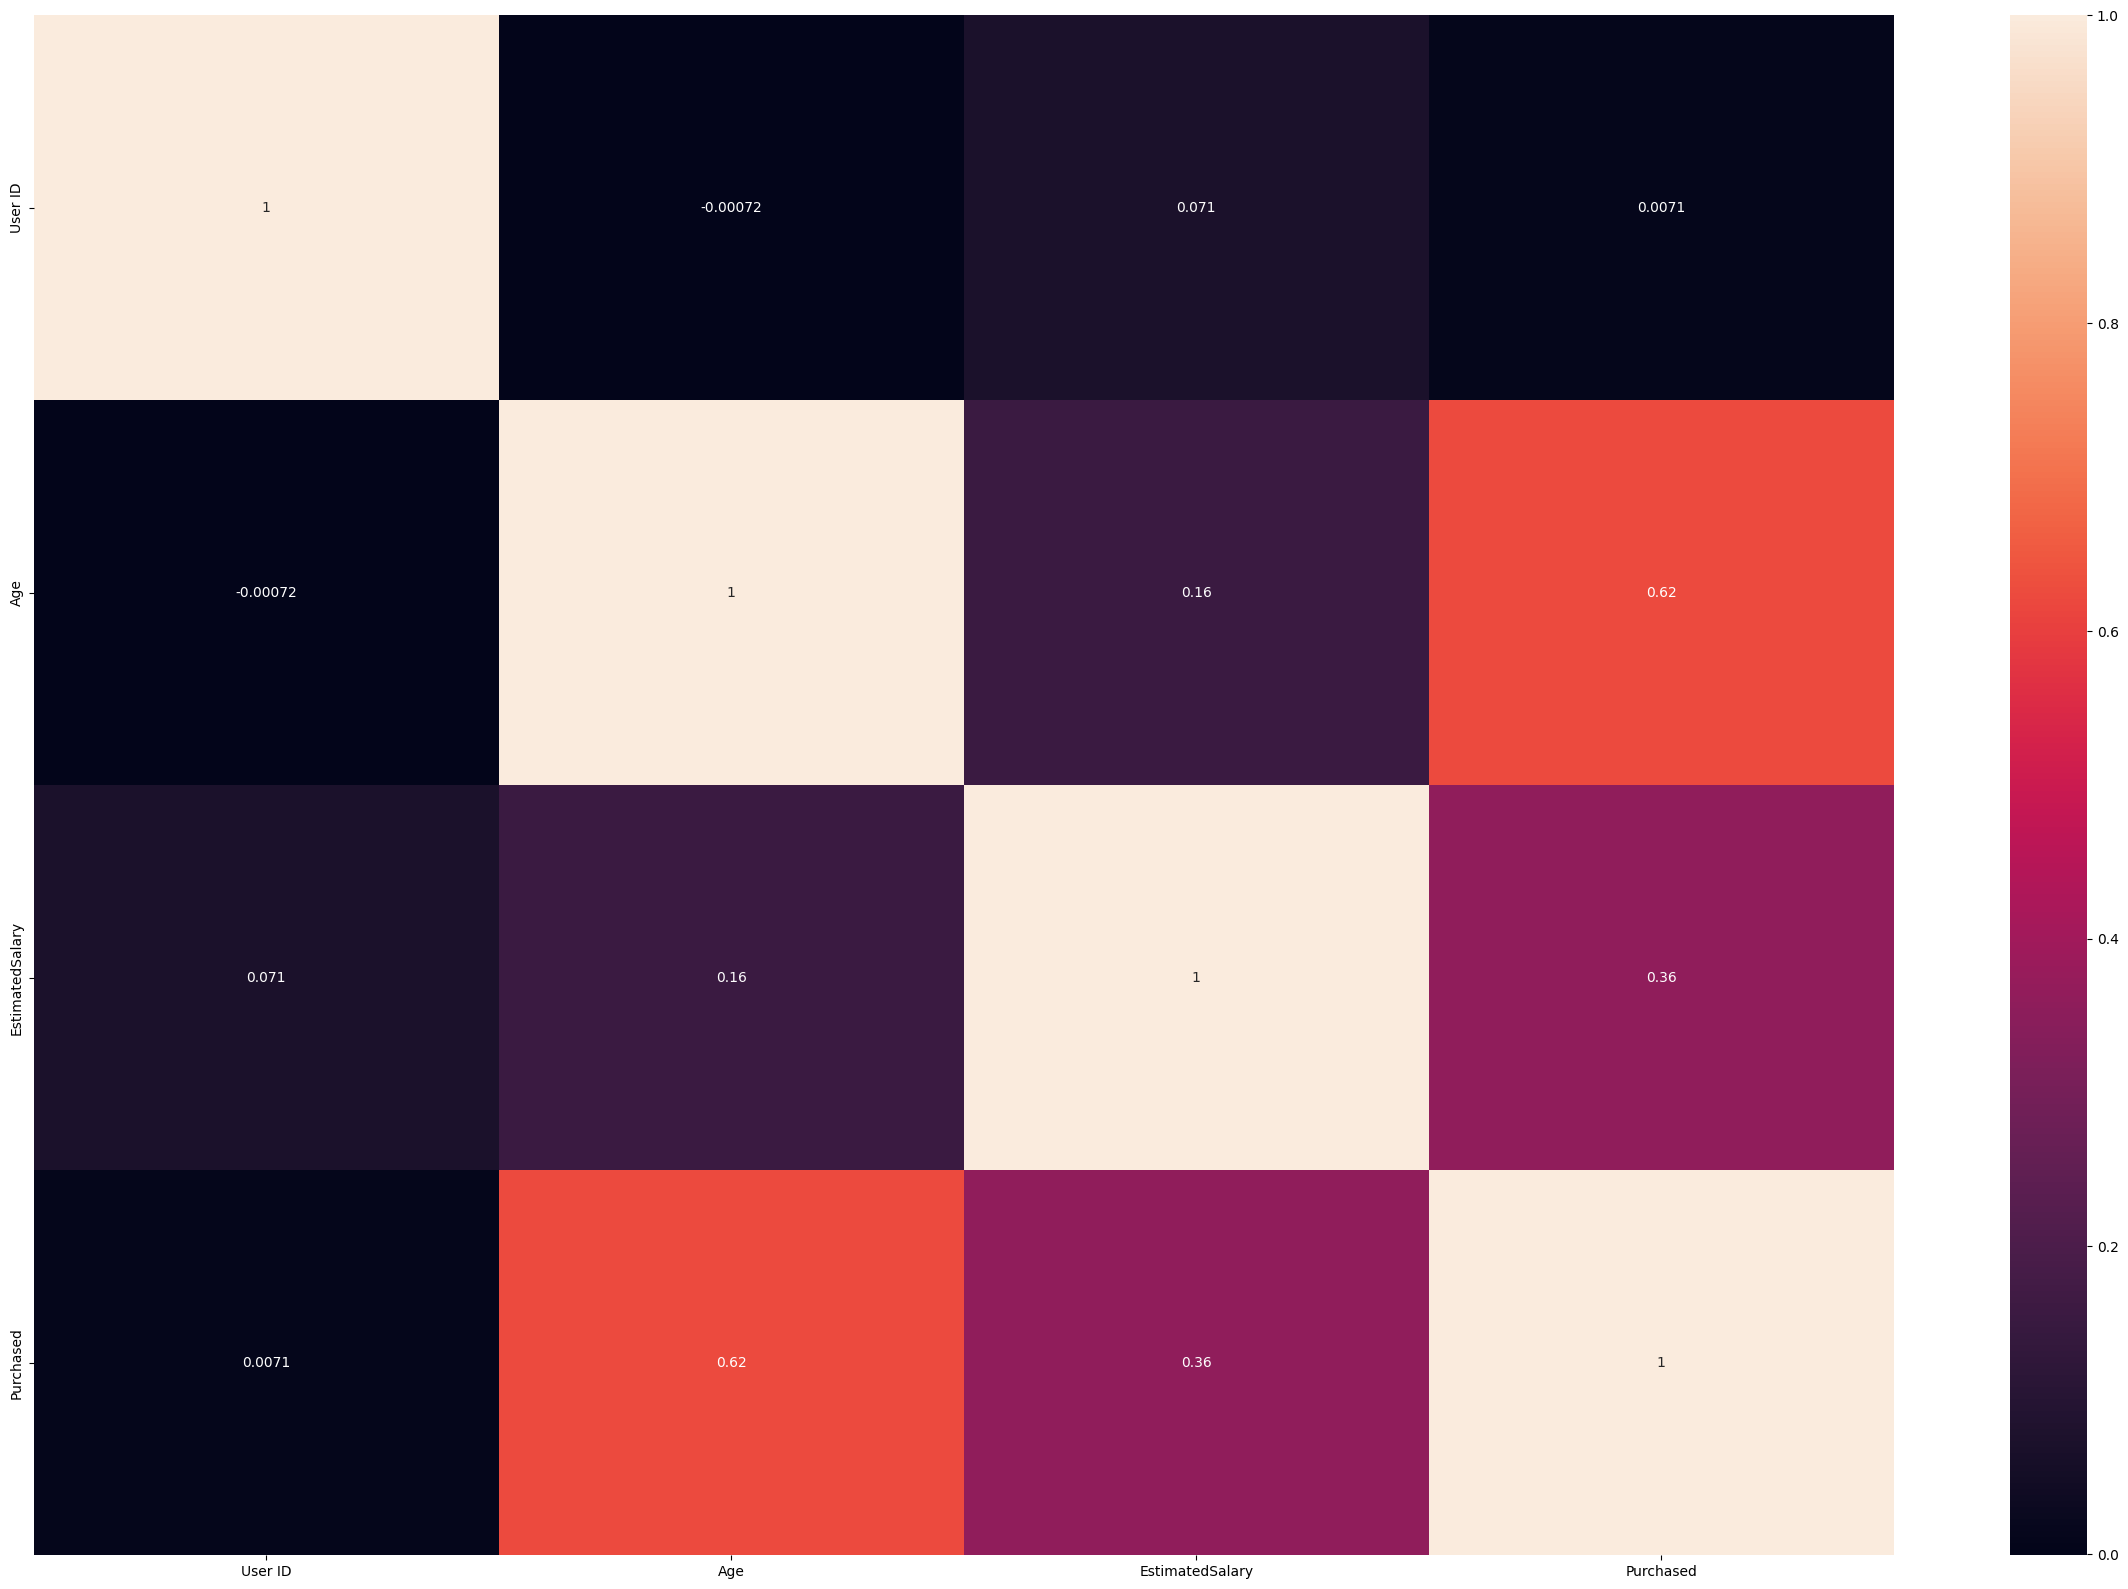

In [ ]:
plt.figure(figsize = (30,20))
sb.heatmap(data3.corr(),annot = True);

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data3['Gender_LabelEncoded'] = label_encoder.fit_transform(data3['Gender'])

In [ ]:
data3

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_LabelEncoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [ ]:
X = data3[['Age', 'EstimatedSalary','Gender_LabelEncoded']]
y = data3['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("\nAccuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.65
Confusion Matrix:
 [[52  0]
 [28  0]]


In [ ]:
scaler = StandardScaler()
columns_to_standardize=['Age', 'EstimatedSalary','Gender_LabelEncoded']
data3[columns_to_standardize] = scaler.fit_transform(data3[columns_to_standardize])
X = data3[['Age', 'EstimatedSalary','Gender_LabelEncoded']]
y = data3['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("\nAccuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8875
Confusion Matrix:
 [[50  2]
 [ 7 21]]


We can clearly see that the accuracy increases when we normalize the data and then use logistic regression on it

Specifying test case for prediciting if they will make a purchase or not

In [ ]:
Some_aunty=[[30 , 100000, 0]]
prediction_case1= model.predict(Some_aunty)
print(prediction_case1)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
